<a href="https://colab.research.google.com/github/CivitCihan/MachineLearning/blob/main/RanForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/Hitters.csv'

df = pd.read_csv(file_path)
df.head()

Mounted at /content/drive


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [ ]:
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [ ]:
rf_model = RandomForestRegressor(random_state=45).fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

280.04929313099416

In [ ]:
rf_params = {"max_depth": [3, 5, 10],
             "max_features": [2, 4, 8],
             "n_estimators": [200, 500, 1000, 2000],
             "min_samples_split": [2, 10, 50, 200]}

In [ ]:
rf_cv_model = GridSearchCV(rf_model, rf_params, cv=8, verbose = 2).fit(X_train, y_train)

Fitting 8 folds for each of 144 candidates, totalling 1152 fits
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=500; total time=   0.7s
[CV] END max_depth=3, max_features=2, min_samples_split=2, n_estimators=

In [ ]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_split': 2,
 'n_estimators': 200}

In [ ]:
rf_model = RandomForestRegressor(max_depth=10, max_features=8, min_samples_split=2, n_estimators=200).fit(X_train, y_train)

In [ ]:
y_pred = rf_model.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

269.9980230663335

In [ ]:
rf_model.feature_importances_*100

array([ 3.81570251,  5.22454927,  3.65398388,  6.67805088,  9.39306396,
        6.69494837,  2.15036523,  8.14613587, 15.12050261,  7.17568951,
       10.20172294, 11.42170243,  3.62493417,  4.04113677,  1.13302449,
        0.86088443,  0.19153497,  0.24560208,  0.22646564])

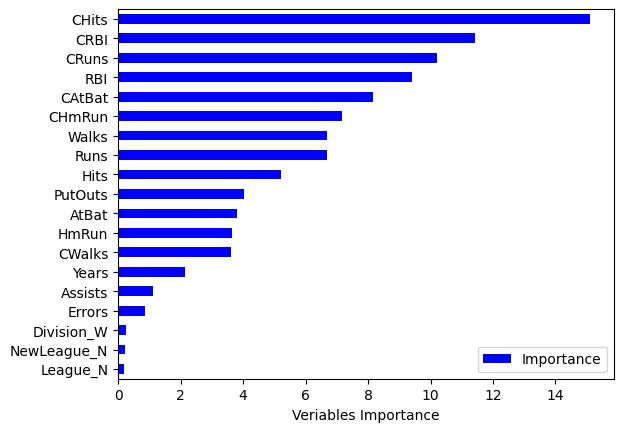

In [ ]:
Importance = pd.DataFrame({"Importance": rf_model.feature_importances_*100},
                          index = X_train.columns)

Importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "barh", color = "blue")

plt.xlabel("Veriables Importance")
plt.show()